Network of neurons
---

In [1]:
import numpy as np

# Load data
with np.load('mnist-6k.npz', allow_pickle=False) as npz_file:
    # Load items into a dictionary
    mnist = dict(npz_file.items())

mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'labels': array([5, 0, 4, ..., 8, 6, 9], dtype=int32)}

In [2]:
from sklearn.model_selection import train_test_split

# Create train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    # Convert uint8 pixel values to float
    mnist['data'].astype(np.float32), # that way we won't get warnings if we need to standardize later
    mnist['labels'],
    test_size=1000, random_state=0
)

# Split again into validation/test sets
X_valid, X_test, y_valid, y_test = train_test_split(
    X_test, y_test,
    test_size=500, random_state=0
)

print('Train:', X_train.shape, y_train.shape)
print('Validation:', X_valid.shape, y_valid.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (5000, 784) (5000,)
Validation: (500, 784) (500,)
Test: (500, 784) (500,)


In [3]:
import tensorflow as tf

# Create placeholders
X = tf.placeholder(dtype=tf.float32, shape=[None, 784]) # None if we don't know the number
y = tf.placeholder(dtype=tf.int32, shape=[None])

In [4]:
# Create variables
W = tf.Variable(initial_value=tf.zeros(shape=[784, 10]))
b = tf.Variable(initial_value=tf.zeros(shape=[10]))

In [5]:
# Compute logits
logits = tf.add(tf.matmul(X, W), b)
print(logits.shape)

(?, 10)


In [6]:
# Cross-entropy loss function
y_one_hot = tf.one_hot(indices=y, depth=10)
ce = tf.nn.softmax_cross_entropy_with_logits_v2(
    labels=y_one_hot, # Requires one-hot encoded labels
    logits=logits
)
print(ce.shape)

(?,)


In [8]:
# Cross-entropy loss function (without one-hot encoding)
ce = tf.nn.sparse_softmax_cross_entropy_with_logits(
    labels=y, logits=logits)
print(ce.shape)

(?,)


In [9]:
# Mean cross-entropy
mean_ce = tf.reduce_mean(ce)
print(mean_ce.shape)

()


In [10]:
# Gradient descent
lr = tf.placeholder(dtype=tf.float32, shape=[])
gd = tf.train.GradientDescentOptimizer(
    learning_rate=lr)

# Minimize cross-entropy
train_op = gd.minimize(mean_ce)

In [11]:
# Compute predictions
predictions = tf.argmax(
    logits, # shape: (n, 10)
    axis=1, # class with max logit
    output_type=tf.int32 # Same type as labels
)
print(predictions.shape)

(?,)


In [12]:
# Are the predictions correct?
is_correct = tf.equal(y, predictions)
print(is_correct.shape)

(?,)


In [13]:
# Accuracy
accuracy = tf.reduce_mean(
    # Convert booleans (false/true) to 0/1 float numbers
    tf.cast(is_correct, dtype=tf.float32)
)
print(accuracy.shape)

()


In [14]:
with tf.Session() as sess:
    # Test reduce_mean operation with different data types
    print(sess.run(
        tf.reduce_mean(
            # Floating points 0/1 values
            [0., 0., 1., 1., 1.]
        )
    ))
    print(sess.run(
        tf.reduce_mean(
            # Integer 0/1 values
            [0, 0, 1, 1, 1]
        )
    ))

0.6
0


In [15]:
# Function to get batches of data
def get_batches(X, y, batch_size):
    # Enumerate indexes by steps of batch_size
    # i: 0, b, 2b, 3b, 4b, .. where b is the batch size
    for i in range(0, len(y), batch_size):
        # "yield" data between index i and i+b (not included)
        yield X[i:i+batch_size], y[i:i+batch_size]

get_batches(X_train, y_train, 64)

<generator object get_batches at 0x7f81645a20f8>

In [16]:
# Use generator in a "for" loop
for X_batch, y_batch in get_batches(X_train, y_train, 64):
    print('Batch X/y:', X_batch.shape, y_batch.shape)

Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
Batch X/y: (64, 784) (64,)
B

In [17]:
# Accuracy score after each batch of data
acc_values = []

# Initialization operation
initialization_op = tf.global_variables_initializer()

with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)

    # Get batches of data
    for X_batch, y_batch in get_batches(X_train, y_train, 64):
        # Run training and evaluate accuracy
        _, batch_acc = sess.run([train_op, accuracy], feed_dict={
            X: X_batch,
            y: y_batch,
            lr: 0.1 # learning rate
        })
        acc_values.append(batch_acc)

    # Get weight matrix and biases
    W_fitted = W.eval()
    b_fitted = b.eval()
    # .. which is equivalent to
    W_fitted, b_fitted = sess.run([W, b])

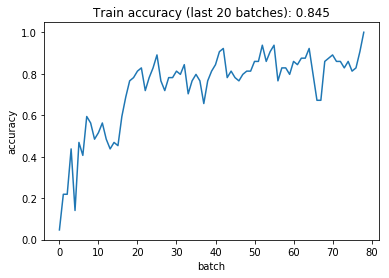

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot accuracy values
plt.plot(acc_values)
plt.title('Train accuracy (last 20 batches): {:.3f}'.format(
    # Average accuracy value
    np.mean(acc_values[-20:])
))
plt.xlabel('batch')
plt.ylabel('accuracy')
plt.show()

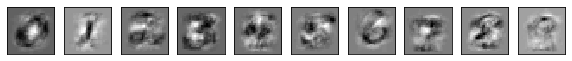

In [19]:
# Create figure with 10 subplots
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 2))

# Plot the weights for each class in a subplot
for i, axis in enumerate(axes):
    # Get weights of the i-th class
    weights = W_fitted[:, i]
    
    # Reshape weight values into a 28x28 array
    template = weights.reshape(28, 28)
    
    # Plot array
    axis.imshow(template, plt.cm.gray_r) # Grayscale (reversed)
    axis.get_xaxis().set_visible(False) # disable x-axis
    axis.get_yaxis().set_visible(False) # disable y-axis
    
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object and fit it to train data
scaler = StandardScaler()
scaler.fit(X_train);

In [21]:
# Accuracy scores after each batch
train_acc_values = []
valid_acc_values = []

with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)
    
    # Rescale input data
    X_train_rescaled = scaler.transform(X_train)
    X_valid_rescaled = scaler.transform(X_valid)
    
    # Get batches of data
    for X_batch, y_batch in get_batches(X_train_rescaled, y_train, 64):
        # Run training and evaluate accuracy
        _, train_acc = sess.run([train_op, accuracy], feed_dict={
            X: X_batch,
            y: y_batch,
            lr: 0.01 # decrease learning rate
        })
        train_acc_values.append(train_acc)
        
        # Evaluate validation accuracy
        valid_acc = sess.run(accuracy, feed_dict={
            X: X_valid_rescaled,
            y: y_valid
        })
        valid_acc_values.append(valid_acc)
        
    # Get weight matrix and biases
    W_fitted = W.eval()
    b_fitted = b.eval()

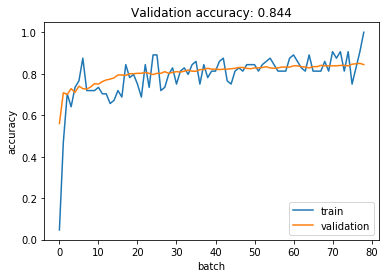

In [22]:
# Plot accuracy values
plt.plot(train_acc_values, label='train')
plt.plot(valid_acc_values, label='validation')
plt.title('Validation accuracy: {:.3f}'.format(
    valid_acc_values[-1] # Last validation accuracy value
))
plt.xlabel('batch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

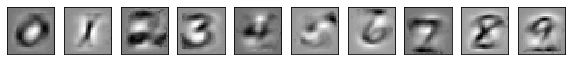

In [23]:
# Create figure with 10 subplots
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 2))

# Plot the weights for each class in a subplot
for i, axis in enumerate(axes):
    # Get weights of the i-th class
    weights = W_fitted[:, i]

    # Reshape weight values into a 28x28 array
    template = weights.reshape(28, 28)

    # Plot array
    axis.imshow(template, plt.cm.gray_r) # Grayscale (reversed)
    axis.get_xaxis().set_visible(False) # disable x-axis
    axis.get_yaxis().set_visible(False) # disable y-axis

plt.show()

In [24]:
with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)
    
    # Compute test accuracy
    acc_val = sess.run(accuracy, feed_dict={
        X: scaler.transform(X_test), # Rescale data
        y: y_test,
        W: W_fitted, # Set weights
        b: b_fitted # Set biases
    })
    print('Test accuracy: {:.3f}'.format(acc_val))

Test accuracy: 0.850
